In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('OA.csv')
df.head()

,Oper,Name,Lines,Lines %,Units,Units %,Avg. Unit Time,Docs,Total Time,Lines/Hr,Avg Lines
0,ALT,Alissa Tidwell,97,8.2,187,7.6,00:00:29,64,01:29:43,65,2
1,AXA,Angel Amezcua,29,2.4,51,2.1,00:00:48,19,00:40:56,43,2
2,BKB,Brenda Babb,66,5.6,156,6.3,00:00:26,40,01:07:17,59,2
3,CJH,Charles Hoeffken III,97,8.2,159,6.4,00:00:57,61,02:31:54,38,2
4,HRB,Heather Brewer,29,2.4,255,10.3,00:00:08,8,00:32:56,53,4


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Oper            14 non-null     object 
 1   Name            14 non-null     object 
 2   Lines           14 non-null     int64  
 3   Lines %         14 non-null     float64
 4   Units           14 non-null     int64  
 5   Units %         14 non-null     float64
 6   Avg. Unit Time  14 non-null     object 
 7   Docs            14 non-null     int64  
 8   Total Time      14 non-null     object 
 9   Lines/Hr        14 non-null     int64  
 10  Avg Lines       14 non-null     int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.3+ KB


<AxesSubplot:>

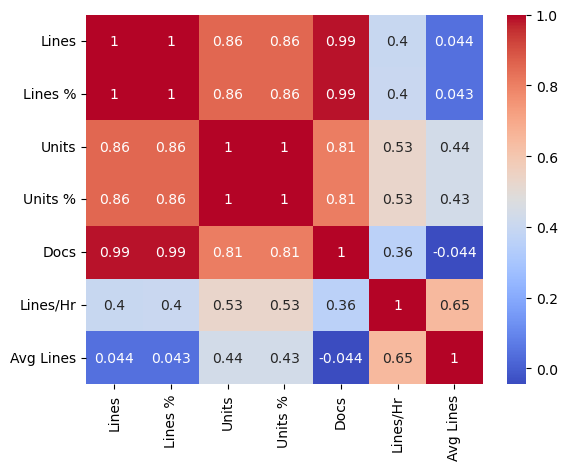

In [27]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [28]:
df_pull = df.copy()

In [54]:
total_time = pd.to_timedelta(df['Total Time'], errors='coerce', unit='hr')
avg_unit = pd.to_timedelta(df['Avg. Unit Time'], errors='coerce', unit='hr')

TypeError: Neither the `x` nor `y` variable appears to be numeric.

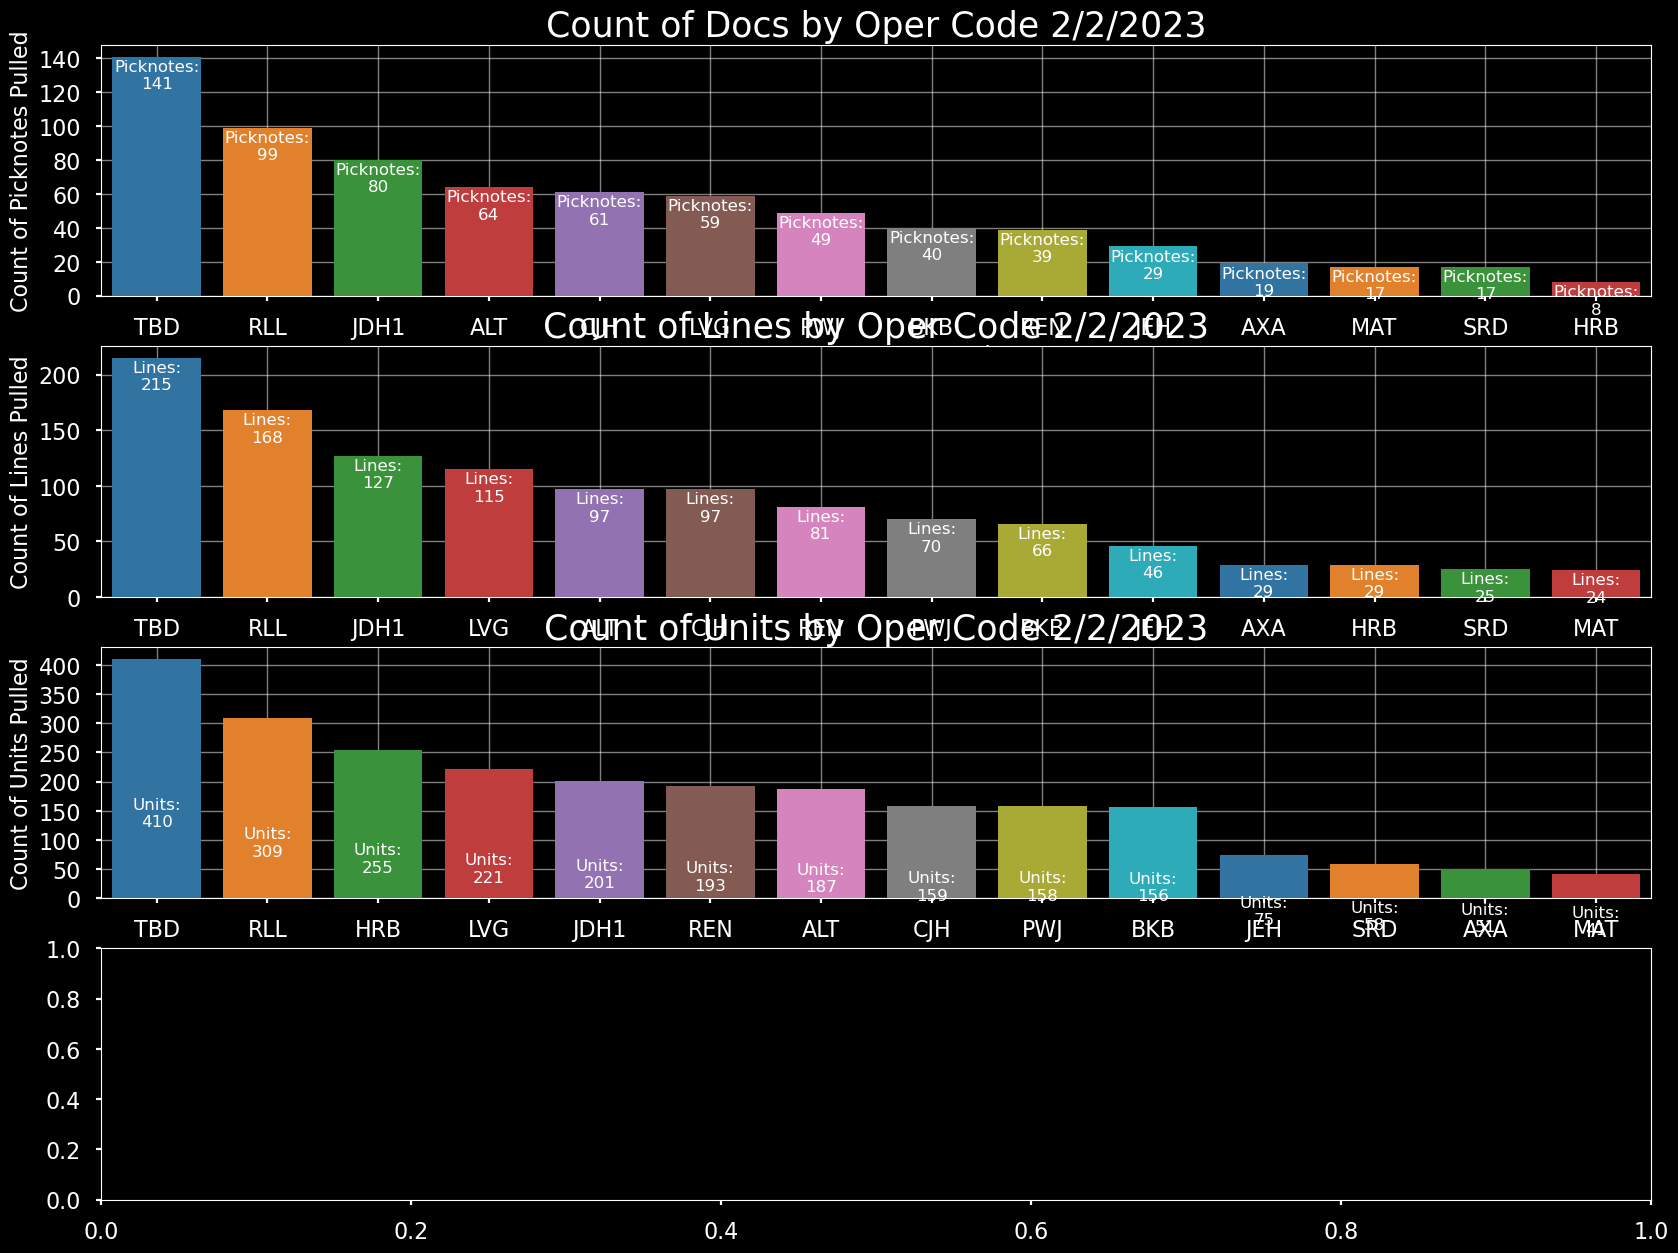

In [55]:
with plt.style.context(['seaborn-muted', 'dark_background', 'tableau-colorblind10', 'seaborn-poster']):
    fig, ax = plt.subplots(4,1,figsize=(20, 15))
    
    ax.ravel()
    
    sorted_values = df_pull.sort_values(['Docs'], ascending=False)
    sns.barplot(data=sorted_values, x='Oper', y='Docs', ax=ax[0], zorder=3, palette='tab10', dodge=False)
    ax[0].set_ylabel('Count of Picknotes Pulled', fontsize=16)
    ax[0].set_xlabel('TS2 Operators ID Code', fontsize=16)
    ax[0].set_title('Count of Docs by Oper Code 2/2/2023', fontsize=25)
    ax[0].grid(zorder=0, color='white', linestyle='-', linewidth=1, alpha=0.5)
    ax[0].bar_label(ax[0].containers[0], fontsize=12, label_type='edge', padding=-25, fmt='Picknotes:\n%d')
    
    sorted_values= df_pull.sort_values(['Lines'], ascending=False)
    sns.barplot(data=sorted_values, x='Oper', y='Lines', ax=ax[1], zorder=3, palette='tab10', dodge=True)
    ax[1].set_ylabel('Count of Lines Pulled', fontsize=16)
    ax[1].set_xlabel('TS2 Operators ID Code', fontsize=16)
    ax[1].set_title('Count of Lines by Oper Code 2/2/2023', fontsize=25)
    ax[1].grid(zorder=0, color='white', linestyle='-', linewidth=1, alpha=0.5)
    ax[1].bar_label(ax[1].containers[0], fontsize=12, label_type='edge', padding=-25, fmt='Lines:\n%d')
    
    sorted_values= df_pull.sort_values(['Units'], ascending=False)
    sns.barplot(data=sorted_values, x='Oper', y='Units', ax=ax[2], zorder=3, palette='tab10')
    ax[2].set_ylabel('Count of Units Pulled', fontsize=16)
    ax[2].set_xlabel('TS2 Operators ID Code', fontsize=16)
    ax[2].set_title('Count of Units by Oper Code 2/2/2023', fontsize=25)
    ax[2].grid(zorder=0, color='white', linestyle='-', linewidth=1, alpha=0.5)
    ax[2].bar_label(ax[2].containers[0], fontsize=12, label_type='center', padding=-25, fmt='Units:\n%d')
    
    sorted_values = df_pull.sort_values(['Total Time'], ascending=False)
    sns.barplot(data=sorted_values, x='Oper', y=total_time, ax=ax[3], zorder=3, palette='tab10') 
    ax[3].set_ylabel('Total Time', fontsize=16)
    ax[3].set_xlabel('TS2 Operators ID Code', fontsize=16)
    ax[3].set_title('Total Time by Oper Code 2/2/2023', fontsize=25)
    ax[3].grid(zorder=0, color='white', linestyle='-', linewidth=1, alpha=0.5)
    ax[3].bar_label(ax[3].containers[0], fontsize=12, label_type='center', padding=-25, fmt='Total Time:\n%s') 
    
plt.suptitle('Pullers Operators Performance 2/2/2023', fontsize=30, color='white')
plt.tight_layout();
plt.show();